In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/kaggle/input/blackfriday"))

# Any results you write to the current directory are saved as output.

['BlackFriday.csv']


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv('/kaggle/input/blackfriday/BlackFriday.csv')
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


* The dataset here is a sample of the transactions made in a retail store. 
* The store wants to know better the customer purchase behaviour against different products. 
* Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.
* There are seven categorical variables to analyse.



Let us list down some points that can be addressed with the analsysis.
1. Understanding the cutomers on the basis of their purchasing habits.
2. Understanding the purchasing habits according to Age groups, Occuptation, City_Categories.
3. The above segmented group of users can be then used to model the data and use to predict the purchase spend for each customer. 
Lets dive in by understanding the data.



In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


**** There are null values in Product_category_2, Product_Category_3

In [66]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


Mean value of Product_Category_2 is 9.8 and that for Product_Category_3 is 12.6, which we will
use to fill the missing values in these two columns.

In [67]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(dataset.iloc[:, 9:11].values)
dataset.iloc[:,9:11] = imputer.transform(dataset.iloc[:, 9:11].values)
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


* Dropping the columns that intuitiey should not imapact the purchase outcome, i.e. User_ID and Product ID. 

In [68]:
dataset.drop(['User_ID','Product_ID'], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 41.0+ MB


In [69]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842144,12.66984,8370
1,F,0-17,10,A,2,0,1,6.000000,14.00000,15200
2,F,0-17,10,A,2,0,12,9.842144,12.66984,1422
3,F,0-17,10,A,2,0,12,14.000000,12.66984,1057
4,M,55+,16,C,4+,0,8,9.842144,12.66984,7969


> There are still some special characters, like (+) in the columns 'Age' and 'stay in Current City_Years, which need to be removed, before machine learning algorithms can be run later.

In [70]:
dataset['Age']=(dataset['Age'].str.strip('+'))


In [71]:
dataset['Stay_In_Current_City_Years']=(dataset['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

* Let us inspect the data now.

In [72]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null float64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 41.0+ MB


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,9.842144,12.66984,8370
1,F,0-17,10,A,2.0,0,1,6.000000,14.00000,15200
2,F,0-17,10,A,2.0,0,12,9.842144,12.66984,1422
3,F,0-17,10,A,2.0,0,12,14.000000,12.66984,1057
4,M,55,16,C,4.0,0,8,9.842144,12.66984,7969


* As can be seen, we have managed to clean the columns to our reuirement and removed the '+' sign from the two columns. 
> At this stage, I will exploratory data analysis by visualising the data, in particular, by visualising the statistical relationship between the different variables.

> Exploratory data analysis supported by data visualisations.

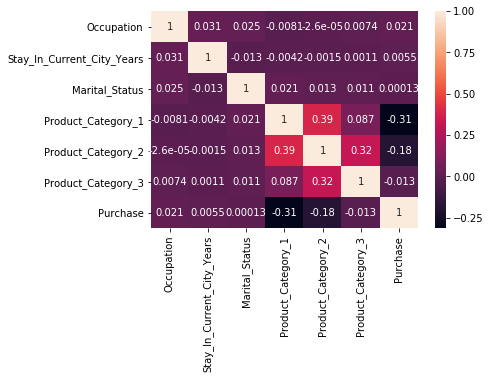

In [73]:
sns.heatmap(
    dataset.corr(),
    annot=True
)


> The key take aways from the above plot are the positive correlation coefficients of three features as a function of Purchase:
* Occupation
* Stay_In_Current_City_Years
* Marital Status

> Increase in any of the values for the above three features is likey to result in a higher purchase from the customer.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


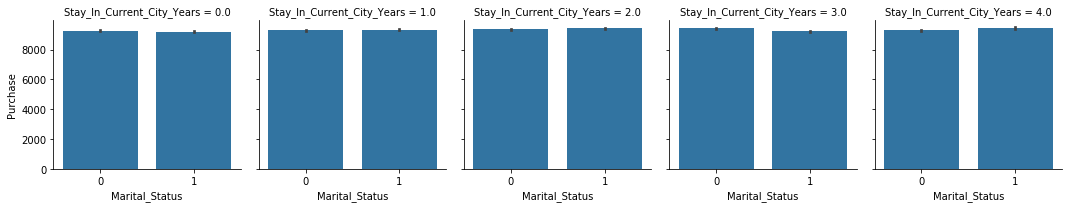

In [74]:
g = sns.FacetGrid(dataset,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

> It is difficult to conclude anything from the above visulaisation, but it might be useful to analyse if the trend shows something different across the different cities. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


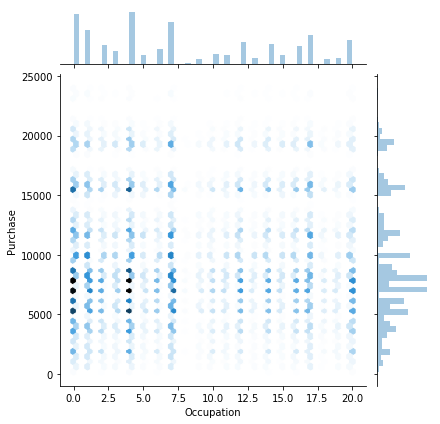

In [75]:
sns.jointplot(x='Occupation',y='Purchase',
              data=dataset, kind='hex'
             )

1.  First insight would be that most of the purchase is done between 5000-10000. 
2. Next important insight, would be the occupations that lead to highest purchases. In this case, it would be occupation 4, listed in the dataset, closely followed that by 0 and 7.
> One can imagine that the store can run targeted advertiements next time around to people with above listed occupations as they more likely to spend within the above purchase range.

**To get a better understanding, we will now analyse the purchase habits across the different city categories.**

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


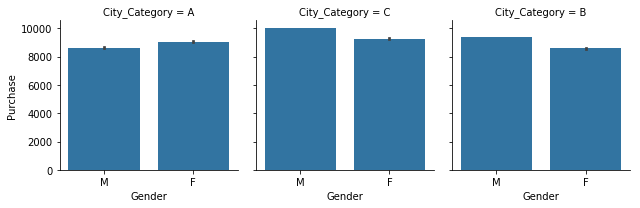

In [76]:
g = sns.FacetGrid(dataset,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

1. Clearly people from City_Category C are showing higher purchase capacity as compared to the other two cities on average.
2. For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_C, where Females tend to puchase more than men. It is a useful insight, and it be useful to oserve which age group of females does higher purchasing.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


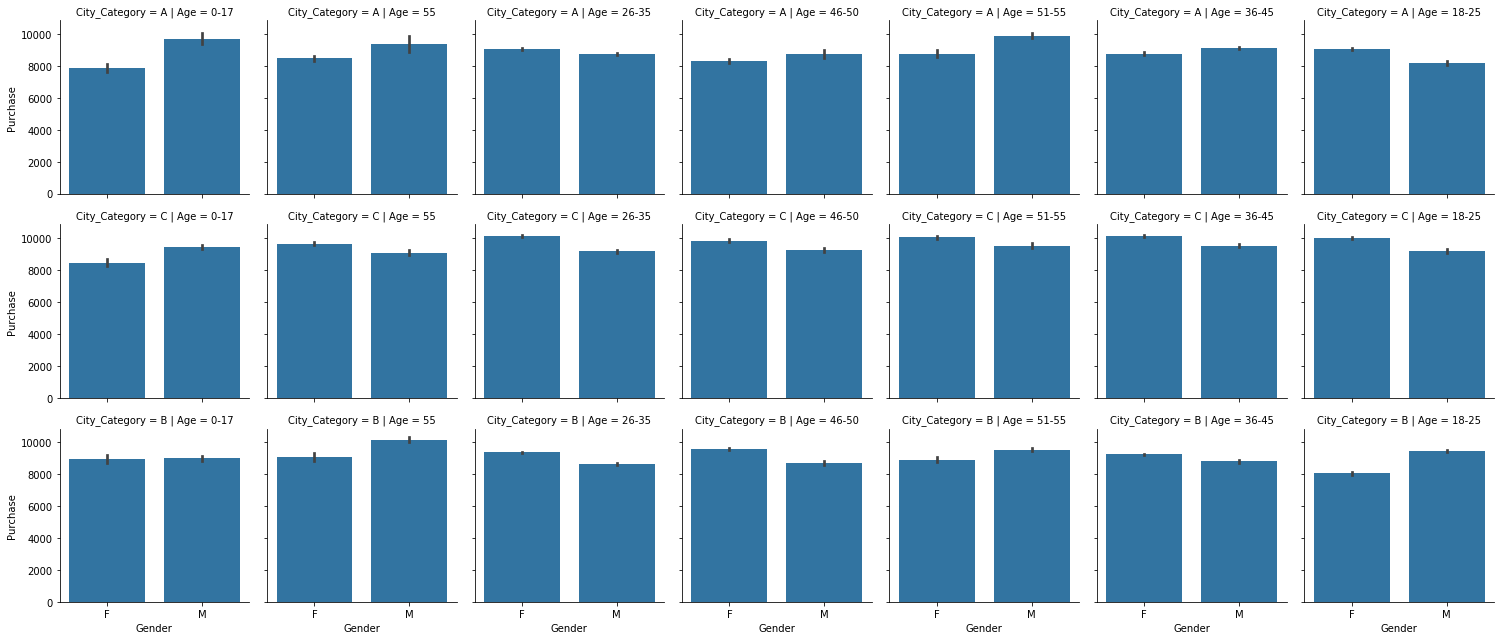

In [77]:
g = sns.FacetGrid(dataset,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

* So, we focus on the first row of the visuaisation, i.e. City_Category_A and then on the bar for females. 
> There are two age groups that can be identified with higher purchase, 26-35 and 18-25. 
Therefore, apart from the male population of all the three city categories, females of City Category A in the above two identifies age groups can be identified as potential buyers for next time around.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


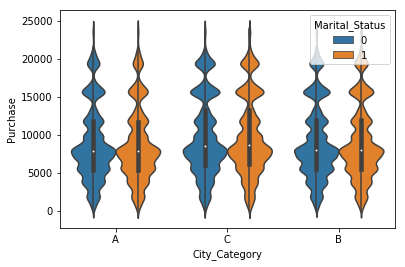

In [78]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',
               data=dataset)

* Ananlysis of Purchase capacity as a function of Marital Status across city categories does not show a definitive trend. It would lead to a lot of assumptions and might lead to wrong conlcusions.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


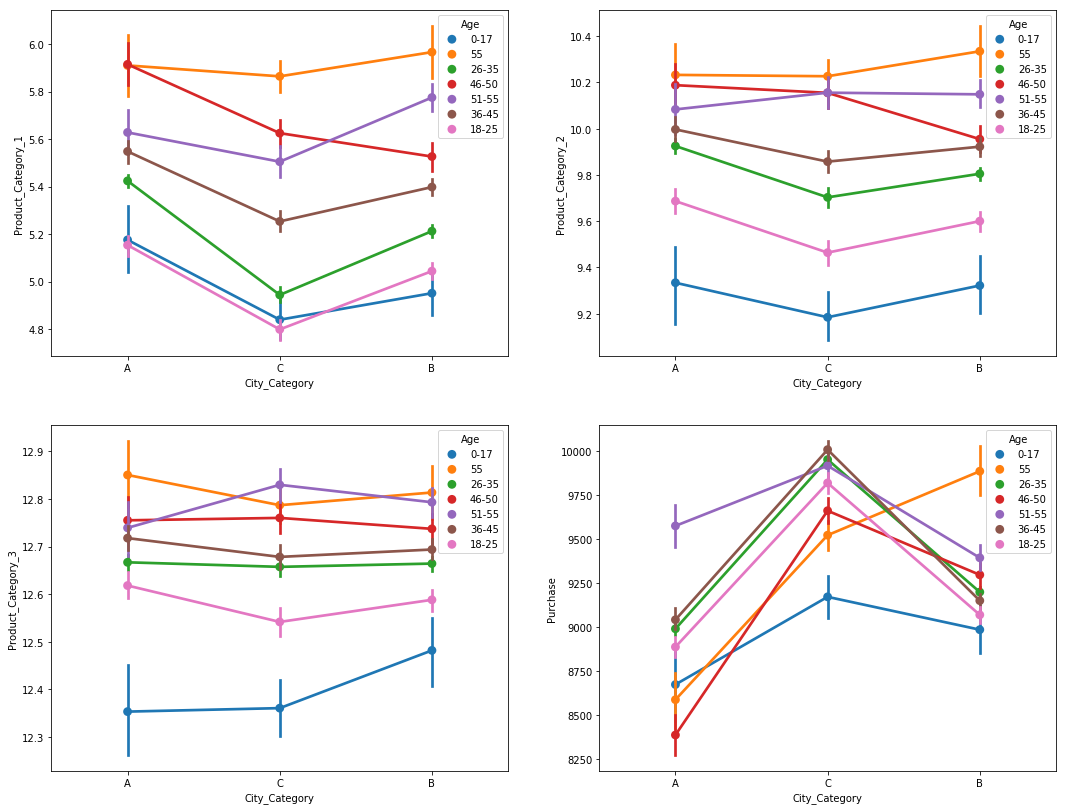

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=dataset,
                 ax=axes[0,0]
                )
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=dataset,
                 ax=axes[0,1]
                )
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=dataset,
                 ax=axes[1,0]
                )
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=dataset,
                 ax=axes[1,1]
                )


Picking one key highlight from the above visualisation:
> The stark difference in the purchase acoss City_Categories for the Age Group of 55 and above. It is highest in City_Category_B, as compared to the other age groups which tend to show high purchase in City_Category_C. 

Having listed down the insights from each step above, let us now move to the next stage of the project, i.e data modelling and predication of sales.

In [80]:
#Dividing the data into test and train datasets
X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Let us inspet each of the split datasets

In [81]:
X_train


array([['M', '26-35', 0, ..., 8, 9.842144034798471, 12.669840149015693],
       ['M', '26-35', 2, ..., 5, 9.842144034798471, 12.669840149015693],
       ['M', '26-35', 0, ..., 8, 14.0, 12.669840149015693],
       ...,
       ['F', '46-50', 15, ..., 5, 9.842144034798471, 12.669840149015693],
       ['M', '18-25', 4, ..., 2, 4.0, 12.669840149015693],
       ['M', '55', 17, ..., 8, 17.0, 12.669840149015693]], dtype=object)

In [82]:
y_train

array([ 7837,  8762,  7778, ...,  6991, 13251,  9905])

In [83]:
X_test


array([['F', '18-25', 4, ..., 1, 8.0, 9.0],
       ['M', '26-35', 20, ..., 7, 9.842144034798471, 12.669840149015693],
       ['M', '51-55', 2, ..., 6, 8.0, 12.669840149015693],
       ...,
       ['F', '26-35', 1, ..., 8, 9.842144034798471, 12.669840149015693],
       ['M', '26-35', 14, ..., 5, 14.0, 12.669840149015693],
       ['M', '36-45', 14, ..., 6, 16.0, 12.669840149015693]], dtype=object)

In [84]:
y_test

array([11394, 12781, 20068, ...,  7957,  8770, 20487])

For X_rrain and X_test, there are categorical variables, which need to be encoded before they can be incorporated into the data model. We will convert each of the variable step by step and cross check our results.

In [85]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder()
X_train



array([['M', '26-35', 0, ..., 8, 9.842144034798471, 12.669840149015693],
       ['M', '26-35', 2, ..., 5, 9.842144034798471, 12.669840149015693],
       ['M', '26-35', 0, ..., 8, 14.0, 12.669840149015693],
       ...,
       ['F', '46-50', 15, ..., 5, 9.842144034798471, 12.669840149015693],
       ['M', '18-25', 4, ..., 2, 4.0, 12.669840149015693],
       ['M', '55', 17, ..., 8, 17.0, 12.669840149015693]], dtype=object)

In [86]:
X_train[:, 0] = labelencoder_X_train.fit_transform(X_train[:, 0])
X_train

array([[1, '26-35', 0, ..., 8, 9.842144034798471, 12.669840149015693],
       [1, '26-35', 2, ..., 5, 9.842144034798471, 12.669840149015693],
       [1, '26-35', 0, ..., 8, 14.0, 12.669840149015693],
       ...,
       [0, '46-50', 15, ..., 5, 9.842144034798471, 12.669840149015693],
       [1, '18-25', 4, ..., 2, 4.0, 12.669840149015693],
       [1, '55', 17, ..., 8, 17.0, 12.669840149015693]], dtype=object)

In [87]:
X_train[:, 1] = labelencoder_X_train.fit_transform(X_train[:, 1])
X_train

array([[1, 2, 0, ..., 8, 9.842144034798471, 12.669840149015693],
       [1, 2, 2, ..., 5, 9.842144034798471, 12.669840149015693],
       [1, 2, 0, ..., 8, 14.0, 12.669840149015693],
       ...,
       [0, 4, 15, ..., 5, 9.842144034798471, 12.669840149015693],
       [1, 1, 4, ..., 2, 4.0, 12.669840149015693],
       [1, 6, 17, ..., 8, 17.0, 12.669840149015693]], dtype=object)

In [88]:
X_train[:, 3] = labelencoder_X_train.fit_transform(X_train[:, 3])
X_train

array([[1, 2, 0, ..., 8, 9.842144034798471, 12.669840149015693],
       [1, 2, 2, ..., 5, 9.842144034798471, 12.669840149015693],
       [1, 2, 0, ..., 8, 14.0, 12.669840149015693],
       ...,
       [0, 4, 15, ..., 5, 9.842144034798471, 12.669840149015693],
       [1, 1, 4, ..., 2, 4.0, 12.669840149015693],
       [1, 6, 17, ..., 8, 17.0, 12.669840149015693]], dtype=object)

> Doing the same steps for the X_test dataset

In [89]:
labelencoder_X_test = LabelEncoder()
X_test

array([['F', '18-25', 4, ..., 1, 8.0, 9.0],
       ['M', '26-35', 20, ..., 7, 9.842144034798471, 12.669840149015693],
       ['M', '51-55', 2, ..., 6, 8.0, 12.669840149015693],
       ...,
       ['F', '26-35', 1, ..., 8, 9.842144034798471, 12.669840149015693],
       ['M', '26-35', 14, ..., 5, 14.0, 12.669840149015693],
       ['M', '36-45', 14, ..., 6, 16.0, 12.669840149015693]], dtype=object)

In [90]:
X_test[:, 0] = labelencoder_X_test.fit_transform(X_test[:, 0])
X_test

array([[0, '18-25', 4, ..., 1, 8.0, 9.0],
       [1, '26-35', 20, ..., 7, 9.842144034798471, 12.669840149015693],
       [1, '51-55', 2, ..., 6, 8.0, 12.669840149015693],
       ...,
       [0, '26-35', 1, ..., 8, 9.842144034798471, 12.669840149015693],
       [1, '26-35', 14, ..., 5, 14.0, 12.669840149015693],
       [1, '36-45', 14, ..., 6, 16.0, 12.669840149015693]], dtype=object)

In [91]:
X_test[:, 1] = labelencoder_X_test.fit_transform(X_test[:, 1])
X_test

array([[0, 1, 4, ..., 1, 8.0, 9.0],
       [1, 2, 20, ..., 7, 9.842144034798471, 12.669840149015693],
       [1, 5, 2, ..., 6, 8.0, 12.669840149015693],
       ...,
       [0, 2, 1, ..., 8, 9.842144034798471, 12.669840149015693],
       [1, 2, 14, ..., 5, 14.0, 12.669840149015693],
       [1, 3, 14, ..., 6, 16.0, 12.669840149015693]], dtype=object)

In [92]:
X_test[:, 3] = labelencoder_X_test.fit_transform(X_test[:, 3])
X_test

array([[0, 1, 4, ..., 1, 8.0, 9.0],
       [1, 2, 20, ..., 7, 9.842144034798471, 12.669840149015693],
       [1, 5, 2, ..., 6, 8.0, 12.669840149015693],
       ...,
       [0, 2, 1, ..., 8, 9.842144034798471, 12.669840149015693],
       [1, 2, 14, ..., 5, 14.0, 12.669840149015693],
       [1, 3, 14, ..., 6, 16.0, 12.669840149015693]], dtype=object)

Having encoded the features, in the next step we will scale all the features to avoid issues due to different measurement scales.

In [93]:
# Feature Scaling of training and test set
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [94]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error


In [95]:
# compare MAE with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)

In [96]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 5  		 Mean Absolute Error:  2866


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 50  		 Mean Absolute Error:  2245


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 100  		 Mean Absolute Error:  2220


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 300  		 Mean Absolute Error:  2199


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 500  		 Mean Absolute Error:  2194


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 700  		 Mean Absolute Error:  2190


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 800  		 Mean Absolute Error:  2189


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 850  		 Mean Absolute Error:  2188


In [97]:
y_test

array([11394, 12781, 20068, ...,  7957,  8770, 20487])

Fitting the model with the best number of n_estimators, to avoid underfitting and overfitting.

In [98]:
regressor = RandomForestRegressor(n_estimators=700, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Lets us see what our prdicted results look like.

In [99]:
y_pred

array([15466.69425362, 13738.24160545, 18185.64216235, ...,
        7486.62493909,  6203.23944839, 19224.32656689])